## Double Pendulum: Solution

If you connect a pendulum of length $l_1$ and mass $m_1$ to a second pendulum with length $l_2$ and mass $m_2$ you get a double pendulum. The coordinates of the two masses are given by

$$ \begin{eqnarray*}
x_{1} & = & l_{1}\sin\theta_{1}\\
y_{1} & = & -l_{1}\cos\theta_{1}\\
x_{2} & = & l_{1}\sin\theta_{1}+l_{2}\sin\theta_{2}\\
y_{2} & = & -l_{1}\cos\theta_{1}-l_{2}\cos\theta_{2}\end{eqnarray*} $$

and the angles evolve according to the following [differential equations](https://www.myphysicslab.com/pendulum/double-pendulum-en.html)

$$ \begin{eqnarray*}
\ddot{\theta}_{1} & = & \frac{-g(2m_{1}+m_{2})\sin\theta_{1}-m_{2}g\sin(\theta_{1}-2\theta_{2})-2\sin(\theta_{1}-\theta_{2})m_{2}(\dot{\theta}_{2}^{2}l_{2}+\dot{\theta}_{1}^{2}l_{1}\cos(\theta_{1}-\theta_{2}))}{l_{1}(2m_{1}+m_{2}-m_{2}\cos(2\theta_{1}-2\theta_{2}))}\\
\ddot{\theta}_{2} & = & \frac{2\sin(\theta_{1}-\theta_{2})(\dot{\theta}_{1}^{2}l_{1}(m_{1}+m_{2})+g(m_{1}+m_{2})\cos\theta_{1}+\dot{\theta}_{2}^{2}l_{2}m_{2}\cos(\theta_{1}-\theta_{2}))}{l_{2}(2m_{1}+m_{2}-m_{2}\cos(2\theta_{1}-2\theta_{2}))}\end{eqnarray*}$$



where $g=9.81m/s^{2}$.

Show *numerically* that such a systems is [chaotic](https://twitter.com/fermatslibrary/status/838392423063687168), i.e. tiny changes in the initial conditions can lead to completely different evolutions over time.

Solution:

odeint solves 1st order differential equations, but the equations that we need to solve for $\theta_{1}$ and $\theta_{2}$ are of second order (remember that $\dot{\theta}_{1} = \frac{d\theta_{1}}{dt}$ where t is time)

A 2nd order differential equation can be converted into two 1st order differential equations by a change of variables. Since we have two 2nd order differential equations, we will end up with four 1st order differential equations.

We define the following change of variables:

$$ \begin{eqnarray*}
\theta_{1} & = & \alpha_{1}\\
\dot{\theta}_{1} & = & {\alpha}_{2}\\
\\
\theta_{2} & = & \beta_{1}\\
\dot{\theta}_{2} & = & \beta_{2}\end{eqnarray*}$$

Using this and substituting the new variables into the equations we want to solve we obtain two of the four final 1st order differential equations:

$$ \begin{eqnarray*}
\dot{\alpha}_{2} & = & \frac{-g(2m_{1}+m_{2})\sin\alpha_{1}-m_{2}g\sin(\alpha_{1}-2\beta_{1})-2\sin(\alpha_{1}-
\beta_{1})m_{2}(\beta_{2}^{2}l_{2}+{\alpha}_{2}^{2}l_{1}\cos(\alpha_{1}-\beta_{1}))}{l_{1}(2m_{1}+m_{2}-
m_{2}\cos(2\alpha_{1}-2\beta_{1}))}\\
\dot{\beta}_{2} & = & \frac{2\sin(\alpha_{1}-\beta_{1})({\alpha}_{2}^{2}l_{1}(m_{1}+m_{2})+g(m_{1}+m_{2})
\cos\alpha_{1}+\beta_{2}^{2}l_{2}m_{2}\cos(\alpha_{1}-\beta_{1}))}{l_{2}(2m_{1}+m_{2}-m_{2}\cos(2\alpha_{1}-
2\beta_{1}))}\end{eqnarray*}$$

And by the definition of our new variables we also have the two other final 1st order differential equations 

$$ \begin{eqnarray*}
\dot{\alpha}_{1} & = & \alpha_{2}\\
\dot{\beta}_{1} & = & \beta_{2}\end{eqnarray*}$$





In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

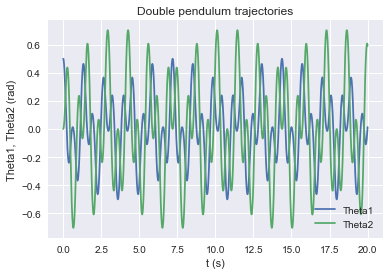

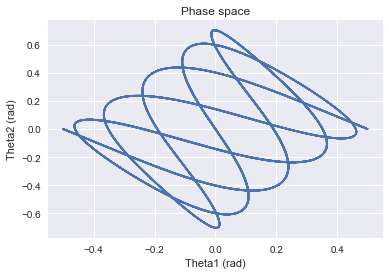

In [39]:
# We choose values for the parameters of the system: 
# the value of gravitational acceleration (m/s^2), the masses (kg) and lengths (m) of the pendulums
# One can play with these values to study the different behaviors of the system when changing the parameters

g = 9.81
m1 = 0.1
m2 = 0.1
l1 = 0.3
l2 = 0.3

# We define the right hand side of the differential equations we want to solve 

# We have a system of four 1st order differential equations, so we use an array, U, with four entries:

def dU_dt(U, t):
    # Here U is a vector such that alfa1=U[0], alfa2=U[1], beta1=U[2] and beta2=U[3]. 
    # So our function dU_dt should return [d(alfa1)/dt, d(alfa2)/dt, d(beta1)/dt, d(beta2)/dt]
    # These are the right hand sides of the four 1st order differential equations
    return [U[1], ( -g*(2*m1+m2)*np.sin(U[0]) - m2*g*np.sin(U[0]-2*U[2]) - 2*np.sin(U[0]-U[2])*m2*((U[3]**2)*l2+(U[1]**2)*l1*np.cos(U[0]-U[2])) )/( l1*(2*m1+m2-m2*np.cos(2*U[0]-2*U[2])) ),U[3], ( 2*np.sin(U[0]-U[2])*((U[1]**2)*l1*(m1+m2)+g*(m1+m2)*np.cos(U[0]) + (U[3]**2)*l2*m2*np.cos(U[0]-U[2]))  )/( l2*(2*m1+m2-m2*np.cos(2*U[0]-2*U[2])) )]

# We choose the initial conditions (U0) for the angles
# The first entry is the initial angle of the first pendulum
# The second one is its initial angular velocity (rad/s)
# The third and fourth are the same for the second pendulum
U0 = [0.5, 0, 0, 0]  

# We are interested in seeing the trajectories of the pendulums, i.e., how their angles evolve with time
# The corresponding entries to Theta1=alfa1 and Theta2=beta1, the two angles of the pendulums
# are the 0th and 2nd column of U and Usol

tsol = np.linspace(0, 20, 2000)
Usol = odeint(dU_dt, U0, tsol)
theta1sol = Usol[:,0] 
theta2sol = Usol[:,2]

# We plot the trajectories of the pendulums

plt.figure()
plt.plot(tsol,theta1sol, label='Theta1')
plt.plot(tsol,theta2sol, label='Theta2')
plt.legend(loc=0)
plt.xlabel("t (s)")
plt.ylabel("Theta1, Theta2 (rad)")
plt.title("Double pendulum trajectories")
plt.show()

# We also plot the phase space of the double pendulum

plt.xlabel("Theta1 (rad)")
plt.ylabel("Theta2 (rad)")
plt.title("Phase space")
plt.plot(theta1sol,theta2sol)
plt.show()



In order to start, first choose a double pendulum with equal masses and lengths and where we only move the first pendulum away from its equilibrium position and let it fall from there (so all initial values in U0 are zero except the first entry, which corresponds to $\theta_{1} = \alpha_{1}$). First choose a small value for the initial $\theta_{1}$, like 0.5, and observe how the trajectories are relatively "periodic" and the phase space has a clear pattern where the system stays stable inside. In this case we are in the small angle approximation and the system does not behave very chaotically; if you try to change the initial conditions only slightly you will not notice any huge differences in trajectories or phase space.

Now try a higher value for the initial $\theta_{1}$, like 1.7, and observe how the trajectories are not periodic anymore. You will also see that the phase change graph seems more "random" instead of a clearly defined pattern. The system now behaves chaotically because we are not in the small angle approximation anymore. Try changing the initial condition only a little bit, for a example with $\theta_{1}$ being 1.75 instead of 1.7 and see how the trajectories and phase space graph change completely.

Now try an even higher value like 2.5 for the initial $\theta_{1}$ and you will see that the system seems even more chaotic now.

You can now play around with other values, like changing the initial second angle $\theta_{2}$, the initial angular velocities and the pendulum parameters.

Notice how in the chaotic cases the second pendulum angle $\theta_{2}$ sometimes exceeds the range of [-$\pi$,$\pi$] and then oscillates around another value instead of 0. Is this an error in the calculation or does this have a physical interpretation?

